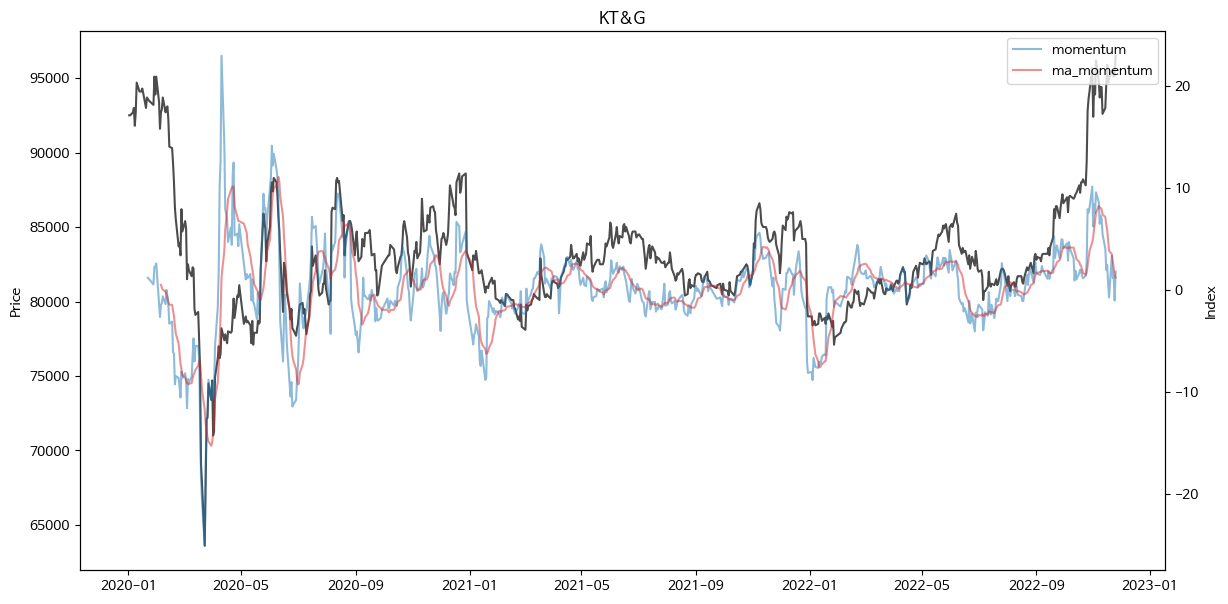

In [9]:
# 모멘텀
#출처: https://kirion.tistory.com/entry/파이썬-투자-보조-지표-분석-전략-설계-모멘텀 [잡다한 지식 창고:티스토리]

import talib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import copy
df_krx = fdr.StockListing('KRX')

#kospi_data = df_krx[(df_krx["Market"]=="KOSPI") & (~df_krx["Sector"].isna())]
kospi_data = df_krx[(df_krx["Market"]=="KOSPI")]

target = kospi_data[kospi_data["Name"]=="KT&G"]

price_data = fdr.DataReader("033780","2020","2022-11-25")
momentum = price_data['Close'].pct_change(14) *100
ma_momentum = momentum.rolling(window=9).mean()

price_data["momentum"] = momentum

price_data["ma_momentum"] = ma_momentum
fig, ax1 = plt.subplots(figsize = (14,7)) 
ax1.set_ylabel('Price') 
ax1.plot(price_data["Close"],color = "black",alpha = 0.7)

ax2 = ax1.twinx() 
ax2.set_ylabel('Index') 

ax2.plot(price_data["momentum"],color = "tab:blue",alpha = 0.5)
ax2.plot(price_data["ma_momentum"],color = "tab:red",alpha = 0.5)
ax2.legend(["momentum","ma_momentum"],loc = "upper right")
plt.title(target["Name"].values[0])

plt.show()

In [1]:
# 지수

from pykrx import stock

for ticker in stock.get_index_ticker_list('20210415', market='KOSDAQ'):
    print(ticker, stock.get_index_ticker_name(ticker))

2001 코스닥
2002 코스닥 대형주
2003 코스닥 중형주
2004 코스닥 소형주
2012 기타서비스
2015 코스닥 IT
2024 제조업
2026 건설
2027 유통
2029 운송
2031 금융
2037 오락·문화
2041 통신방송서비스
2042 IT S/W & SVC
2043 IT H/W
2056 음식료·담배
2058 섬유·의류
2062 종이·목재
2063 출판·매체복제
2065 화학
2066 제약
2067 비금속
2068 금속
2070 기계·장비
2072 일반전기전자
2074 의료·정밀기기
2075 운송장비·부품
2077 기타제조
2151 통신서비스
2152 방송서비스
2153 인터넷
2154 디지털컨텐츠
2155 소프트웨어
2156 컴퓨터서비스
2157 통신장비
2158 정보기기
2159 반도체
2160 IT부품
2181 코스닥 우량기업부
2182 코스닥 벤처기업부
2183 코스닥 중견기업부
2184 코스닥 기술성장기업부
2203 코스닥 150
2212 코스닥 150 소재
2213 코스닥 150 산업재
2214 코스닥 150 필수소비재
2215 코스닥 150 자유소비재
2216 코스닥 150 정보기술
2217 코스닥 150 헬스케어
2218 코스닥 150 커뮤니케이션서비스


In [2]:
for ticker in stock.get_index_portfolio_deposit_file('2066') :
    print(ticker, stock.get_market_ticker_name(ticker))

028300 HLB
068760 셀트리온제약
145020 휴젤
000250 삼천당제약
067630 HLB생명과학
237690 에스티팜
214450 파마리서치
214370 케어젠
096530 씨젠
039200 오스코텍
298380 에이비엘바이오
195940 HK이노엔
086900 메디톡스
085660 차바이오텍
086450 동국제약
064550 바이오니아
007390 네이처셀
310210 보로노이
087010 펩트론
206650 유바이오로직스
340570 티앤엘
290650 엘앤씨바이오
256840 한국비엔씨
200130 콜마비앤에이치
053030 바이넥스
243070 휴온스
099430 바이오플러스
200670 휴메딕스
206640 바디텍메드
166480 코아스템켐온
058820 CMG제약
041960 코미팜
307750 국전약품
084110 휴온스글로벌
334970 프레스티지바이오로직스
216080 제테마
174900 앱클론
102940 코오롱생명과학
086890 이수앱지스
304360 에스바이오메딕스
048530 인트론바이오
205470 휴마시스
078160 메디포스트
036220 오상헬스케어
032300 한국파마
220100 퓨쳐켐
060590 씨티씨바이오
011040 경동제약
042520 한스바이오메드
138610 나이벡
067080 대화제약
234690 녹십자웰빙
006620 동구바이오제약
182400 엔케이맥스
246710 티앤알바이오팹
191420 테고사이언스
023910 대한약품
183490 엔지켐생명과학
082800 비보존 제약
288330 브릿지바이오테라퓨틱스
217730 강스템바이오텍
086820 바이오솔루션
066700 테라젠이텍스
251120 바이오에프디엔씨
100700 세운메디칼
314130 지놈앤컴퍼니
054670 대한뉴팜
078140 대봉엘에스
049960 쎌바이오텍
009300 삼아제약
041910 폴라리스AI파마
330350 위더스제약
067370 선바이오
072020 중앙백신
061250 화일약품
001540 안국약품
0592

In [3]:
df = stock.get_index_ohlcv('20240102', '20240415', '2066')
print(df)

제약               시가       고가       저가       종가       거래량           거래대금  \
날짜                                                                        
2024-01-02  8442.79  8774.73  8393.67  8744.61  45020696  1163320206735   
2024-01-03  8730.53  8883.41  8687.78  8878.44  72777590  1777514324244   
2024-01-04  8814.81  8815.30  8452.28  8469.21  47048328   887403680233   
2024-01-05  8491.59  8604.11  8452.56  8472.97  37340360   735757873957   
2024-01-08  8503.46  8525.11  8342.07  8369.04  27043835   478228248591   
...             ...      ...      ...      ...       ...            ...   
2024-04-08  9163.41  9290.75  9038.91  9200.61  35483907   903708922283   
2024-04-09  9271.15  9338.37  9079.87  9161.68  45117063   791813071892   
2024-04-11  9056.36  9142.50  9028.88  9071.33  25847241   568494126529   
2024-04-12  9124.28  9291.28  9057.73  9275.16  29540657   683853356512   
2024-04-15  9171.23  9268.21  9102.90  9242.09  23032988   435302189656   

제약                  상장시가

In [8]:
df = stock.get_index_fundamental('20230102', '20240415', '2066')
df

,종가,등락률,PER,선행PER,PBR,배당수익률
날짜,,,,,,
2023-01-02,7152.23,-1.54,56.290001,0.0,2.36,0.52
2023-01-03,7131.77,-0.29,56.130001,0.0,2.36,0.52
2023-01-04,7163.95,0.45,56.380001,0.0,2.37,0.52
2023-01-05,7171.07,0.10,56.439999,0.0,2.37,0.52
2023-01-06,7316.74,2.03,57.610001,0.0,2.42,0.51
...,...,...,...,...,...,...
2024-04-08,9200.61,0.99,0.000000,0.0,3.12,0.37
2024-04-09,9161.68,-0.42,0.000000,0.0,3.11,0.38
2024-04-11,9071.33,-0.99,0.000000,0.0,3.08,0.38


In [7]:
df = stock.get_index_fundamental('20240415')
df

,종가,등락률,PER,선행PER,PBR,배당수익률
지수명,,,,,,
코스피,2658.10,-0.88,0.0,0.00,0.0,0.0
코스피 200,363.33,-1.07,0.0,10.72,0.0,0.0
코스피 100,2739.49,-1.00,0.0,11.03,0.0,0.0
코스피 50,2517.00,-0.97,0.0,11.24,0.0,0.0
코스피 200 중소형주,1238.14,-0.77,0.0,0.00,0.0,0.0
코스피 200 초대형제외 지수,251.78,-0.30,0.0,0.00,0.0,0.0
코스피200제외 코스피지수,3341.89,-1.03,0.0,0.00,0.0,0.0
코스피 200 커뮤니케이션서비스,1667.11,-0.51,0.0,0.00,0.0,0.0
코스피 200 건설,304.56,1.17,0.0,0.00,0.0,0.0
